In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [2]:
from pycaret.datasets import get_data
data = get_data('/content/drive/MyDrive/train')

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
w = data.drop(['id'], axis = 1)
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [4]:
from pycaret.classification import *
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE, ADASYN

le = preprocessing.LabelEncoder()
newdata1 = w.apply(le.fit_transform)
newdata1.head

<bound method NDFrame.head of        label  tweet
0          0   4653
1          0   9491
2          0    564
3          0   6704
4          0   4954
...      ...    ...
31957      0  12898
31958      0   1090
31959      0  20688
31960      1   8576
31961      0  25250

[31962 rows x 2 columns]>

In [5]:
newdata = setup(newdata1, target = 'label', session_id = 123, fix_imbalance = True, fix_imbalance_method = ADASYN())

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(31962, 2)"
4,Transformed data shape,"(51274, 2)"
5,Transformed train set shape,"(41685, 2)"
6,Transformed test set shape,"(9589, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [6]:
data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7648,0.4990,0.1765,0.0307,0.0458,-0.0137,-0.0127,0.0840
lda,Linear Discriminant Analysis,0.7637,0.4990,0.1791,0.0360,0.0492,-0.0109,-0.0097,0.1320
dummy,Dummy Classifier,0.7579,0.5000,0.2000,0.0140,0.0262,0.0000,0.0000,0.0720
lr,Logistic Regression,0.7475,0.4990,0.2039,0.0305,0.0454,-0.0059,-0.0055,1.2440
ada,Ada Boost Classifier,0.7266,0.7616,0.6743,0.1590,0.2571,0.1620,0.2263,1.0630
gbc,Gradient Boosting Classifier,0.7214,0.7969,0.7183,0.1632,0.2659,0.1711,0.2434,2.8470
knn,K Neighbors Classifier,0.7199,0.7873,0.7138,0.1615,0.2634,0.1682,0.2398,0.3880
lightgbm,Light Gradient Boosting Machine,0.6803,0.7880,0.7355,0.1464,0.2442,0.1440,0.2201,3.8660
xgboost,Extreme Gradient Boosting,0.6742,0.7859,0.7457,0.1455,0.2433,0.1427,0.2208,0.3130
svm,SVM - Linear Kernel,0.6719,0.5107,0.3000,0.0210,0.0393,-0.0002,-0.0012,0.9490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

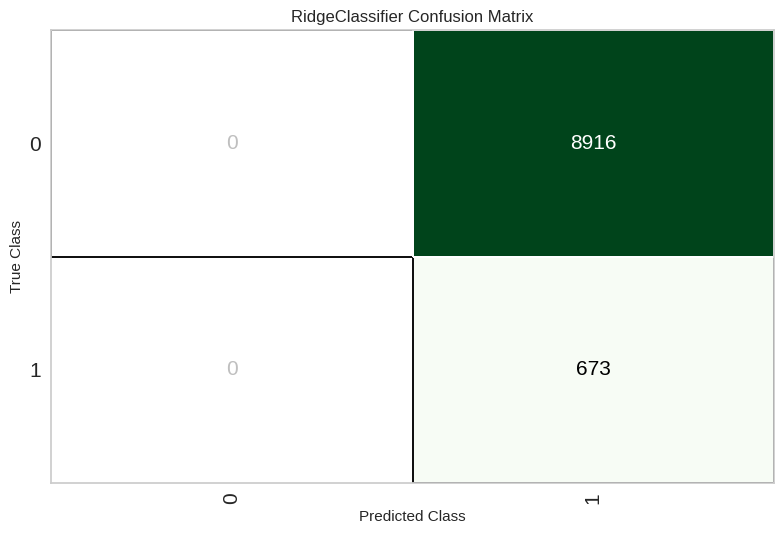

In [8]:
plot_model(best, plot = 'confusion_matrix')

In [9]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.0702,0.5000,1.0000,0.0702,0.1312,0.0000,0.0000


In [14]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.4778,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6814,0.5037,0.1720,0.0443,0.0704,-0.0464,-0.0620
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7586,0.4799,0.1667,0.0596,0.0878,-0.0166,-0.0195
4,0.9008,0.4790,0.0446,0.0886,0.0593,0.0129,0.0138
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.3321,0.4661,0.7197,0.0723,0.1314,0.0044,0.0126
7,0.4072,0.5127,0.6943,0.0786,0.1412,0.0173,0.0420
8,0.8306,0.5126,0.0000,0.0000,0.0000,-0.0896,-0.0912


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5222,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5210,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0706,0.4661,1.0000,0.0702,0.1312,0.0001,0.0058
7,0.9298,0.5127,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9298,0.5126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
r1 = predict_model(ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.0702,0.5000,1.0000,0.0702,0.1312,0.0000,0.0000


In [23]:
r2 = predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.0702,0.5000,1.0000,0.0702,0.1312,0.0000,0.0000


In [24]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
lda = create_model('lda')
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.4778,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6810,0.5037,0.1720,0.0442,0.0703,-0.0465,-0.0623
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7582,0.4799,0.1667,0.0595,0.0877,-0.0168,-0.0198
4,0.9034,0.4790,0.0446,0.0959,0.0609,0.0171,0.0185
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.3317,0.4661,0.7134,0.0717,0.1303,0.0032,0.0090
7,0.4095,0.5127,0.6943,0.0789,0.1417,0.0179,0.0432
8,0.8310,0.5126,0.0000,0.0000,0.0000,-0.0894,-0.0910


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.4778,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6801,0.5037,0.1720,0.0440,0.0701,-0.0468,-0.0628
2,0.9298,0.5390,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7586,0.4799,0.1667,0.0596,0.0878,-0.0166,-0.0195
4,0.9030,0.4790,0.0446,0.0946,0.0606,0.0164,0.0177
5,0.9298,0.4997,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.3321,0.4661,0.7197,0.0723,0.1314,0.0044,0.0126
7,0.4086,0.5127,0.6943,0.0788,0.1415,0.0176,0.0428
8,0.8328,0.5126,0.0000,0.0000,0.0000,-0.0887,-0.0900


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
l1 = predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.0702,0.5200,1.0000,0.0702,0.1312,0.0000,0.0000


In [20]:
l2 = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.0702,0.5200,1.0000,0.0702,0.1312,0.0000,0.0000


In [21]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7239,0.7895,0.7389,0.1674,0.2729,0.1790,0.2550
1,0.7408,0.7990,0.7134,0.1731,0.2786,0.1868,0.2571
2,0.7225,0.8058,0.7516,0.1686,0.2754,0.1816,0.2600
3,0.7233,0.7879,0.7115,0.1620,0.2640,0.1696,0.2408
4,0.7157,0.8243,0.7580,0.1660,0.2723,0.1776,0.2575
5,0.7421,0.7873,0.6688,0.1667,0.2668,0.1740,0.2365
6,0.7416,0.7833,0.6561,0.1643,0.2628,0.1695,0.2299
7,0.7108,0.8005,0.7261,0.1588,0.2606,0.1643,0.2384
8,0.7170,0.8103,0.7261,0.1619,0.2648,0.1695,0.2434


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9298,0.5824,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9298,0.5764,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9298,0.5685,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9303,0.5691,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9298,0.5766,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9298,0.5891,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.2262,0.5809,0.9936,0.0827,0.1527,0.0266,0.1137
7,0.2284,0.5792,0.9873,0.0825,0.1523,0.0261,0.1104
8,0.9298,0.5877,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [11]:
g1 = predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.2247,0.5783,0.9896,0.0823,0.1520,0.0257,0.1102


In [12]:
g2 = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7193,0.7982,0.7058,0.1600,0.2608,0.1653,0.2354


In [25]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…